<a href="https://colab.research.google.com/github/mikekerklin/Machine-Learning-and-Data-Analysis/blob/main/Homework_4_exercise_15_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification with the Breast Cancer Dataset

Importing dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
df_target = pd.DataFrame(breast_cancer['target'], columns=['Cancer'])
print(df_breast_cancer.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Checking Target and Sample Sizes

In [5]:
breast_cancer.target[::50]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [6]:
breast_cancer.data.shape

(569, 30)

In [7]:
breast_cancer.target.shape

(569,)

Splitting the Data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_breast_cancer, np.ravel(df_target), test_size=0.20, random_state=11)

Creating the Model (GaussianNB)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)
estimators = {'GaussianNB': GaussianNB()}


Training the Model

In [10]:
for estimator_name, estimator_object in estimators.items():
    estimator_object.fit(X_train, y_train)
    print(estimator_name + ' trained.')

GaussianNB trained.


Predicting

In [11]:
predictions = {}
for estimator_name, estimator_object in estimators.items():
            predictions[estimator_name] = estimator_object.predict(X_test)
            expected = y_test
            print(f'{estimator_name} \n Predicted: {estimator_object.predict(X_test)} \n Expected: {y_test}')

GaussianNB 
 Predicted: [0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 0] 
 Expected: [0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0]


Estimated Method Score

In [12]:
accuracy_score = {}
for estimator_name, estimator_object in estimators.items():
    accuracy_score[estimator_name] = estimator_object.score(X_test, y_test)
print(f"GaussianNB Accuracy Score: {accuracy_score['GaussianNB']}")
print(f"GaussianNB Accuracy Score: {accuracy_score['GaussianNB']*100:.2f}%")

GaussianNB Accuracy Score: 0.9385964912280702
GaussianNB Accuracy Score: 93.86%


Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrices = {}
for estimator_name, estimator_object in estimators.items():
    confusion_matrices[estimator_name] = confusion_matrix(expected, predictions[estimator_name])
    print(f'{estimator_name} \n {confusion_matrix(expected, predictions[estimator_name])}')

GaussianNB 
 [[32  6]
 [ 1 75]]


Classification Report

In [14]:

classification_reports = {}
for estimator_name, estimator_object in estimators.items():
    classification_reports[estimator_name] = classification_report(expected, predictions[estimator_name])
    print(f'{estimator_name} \n {classification_report(expected, predictions[estimator_name])}')

GaussianNB 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



Visualizing the Confusion Matrix

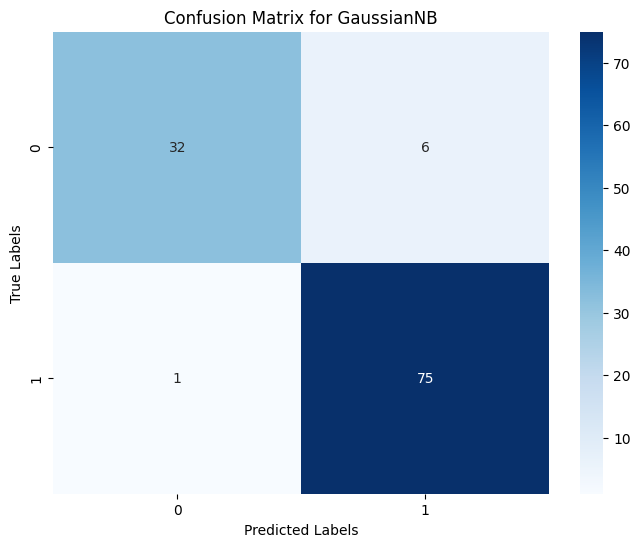

In [15]:
# prompt: plot the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrices['GaussianNB'], annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for GaussianNB")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


K-Fold Cross-Validation

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
KFold = KFold(n_splits=10, shuffle=True, random_state=11)
X = df_breast_cancer.values
y = np.ravel(df_target)
for train_index, test_index in KFold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    modelNB.fit(X_train, y_train)
    print(modelNB.score(X_test, y_test))

0.9649122807017544
0.9122807017543859
0.9473684210526315
0.8947368421052632
0.9649122807017544
0.9473684210526315
0.9649122807017544
0.8947368421052632
0.9649122807017544
0.9285714285714286


[0.94736842 0.87719298 0.89473684 0.92982456 0.94736842 0.96491228
 0.92982456 0.96491228 0.94736842 0.96428571]


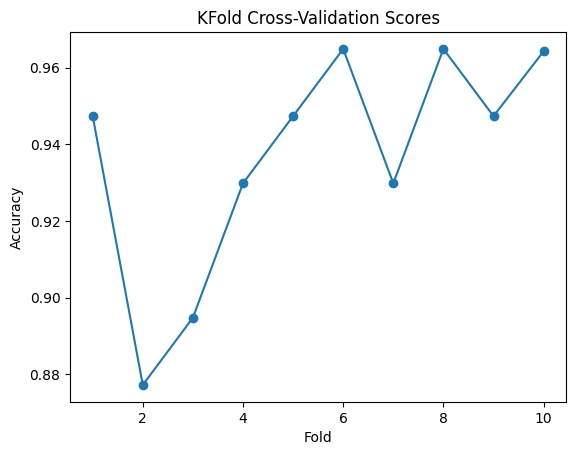

In [17]:
scores = cross_val_score(modelNB, X, y, cv=10)
print(scores)
plt.plot(range(1, 11), scores, marker='o')
plt.title('KFold Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

Running Multiple Models to Find the Best One

In [21]:
estimators = {'GaussianNB': GaussianNB(), 'KNeighborsClassifier': KNeighborsClassifier(), 'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000), 'SVC': SVC(gamma='scale')}
for estimator_name, estimator_object in estimators.items():
    estimator_object.fit(X_train, y_train)
    print(estimator_name + ' trained.')

GaussianNB trained.
KNeighborsClassifier trained.
LogisticRegression trained.
SVC trained.


GaussianNB 
 [0.94736842 0.87719298 0.89473684 0.92982456 0.94736842 0.96491228
 0.92982456 0.96491228 0.94736842 0.96428571]


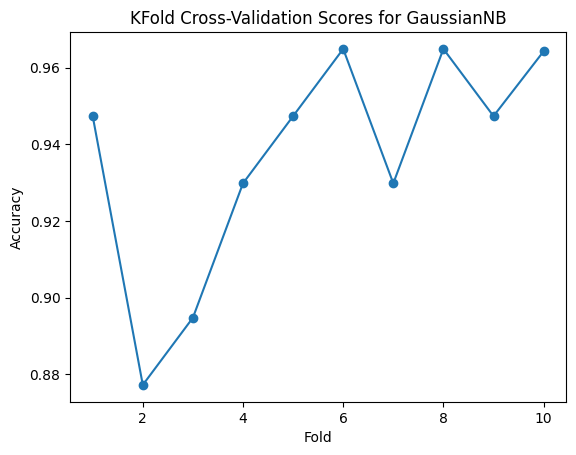

KNeighborsClassifier 
 [0.9122807  0.87719298 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92982456 0.9122807  0.96428571]


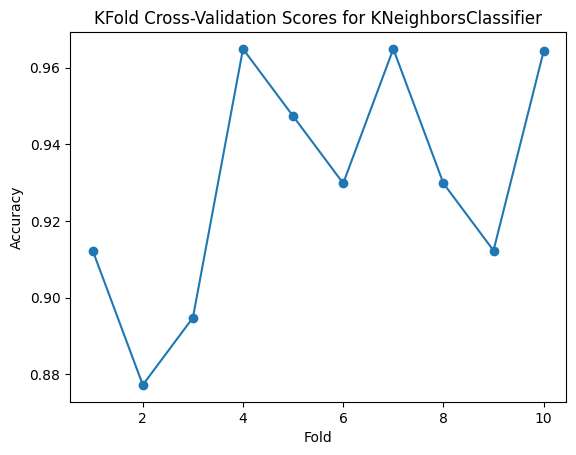

LogisticRegression 
 [0.98245614 0.9122807  0.92982456 0.94736842 0.98245614 0.98245614
 0.92982456 0.94736842 0.96491228 0.96428571]


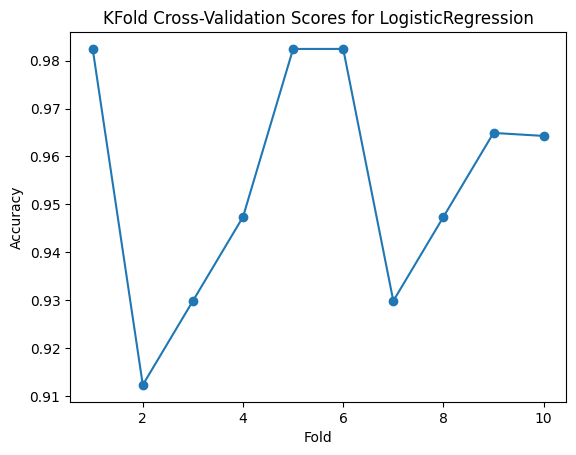

SVC 
 [0.89473684 0.84210526 0.89473684 0.92982456 0.92982456 0.92982456
 0.94736842 0.92982456 0.92982456 0.91071429]


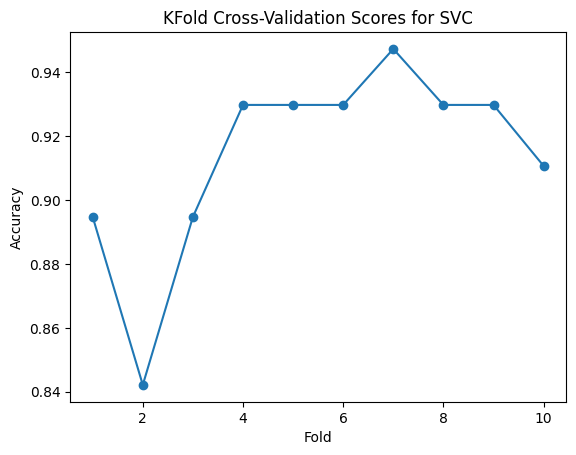

In [23]:
results = {}
for estimator_name, estimator_object in estimators.items():
    predictions[estimator_name] = estimator_object.predict(X_test)
    expected = y_test
    scores = cross_val_score(estimator_object, X, y, cv=10)
    results[estimator_name] = scores
    print(f'{estimator_name} \n {scores}')
    plt.plot(range(1, 11), scores, marker='o')
    plt.title(f'KFold Cross-Validation Scores for {estimator_name}')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.show()
